# Team Members:
    
    Priyanka Upadhyay, Email Id : s8prupad@stud.uni-saarland.de
    Gopal Bhattrai, Email Id : gobh00001@stud.uni-saarland.de

Q1. Given the function definitions below, implement the function and its first derivative using numpy. Plot the functions and the derivatives in the domain [-20, 20] using matplotlib.

a. $f(x) = \frac{1}{1 + e^{-x}}$ (1.5 Point) \\
b. $f(x) = max(0, x)$ (1 Point) \\
c. $f(x) = tanh(x)$ (1.5 Point)

For all the definitions above, $x \in \mathbb{R}$

In [1]:
import numpy as np

def Sigmoid(X,derivative = False):
    Sigma = np.reciprocal(1 + np.exp(-1*X))
    if derivative:
        return Sigma*(1- Sigma)
    return Sigma

def tanh(X,derivative = False):
    tan_h = 2*Sigmoid(2*X) - 1
    if derivative:
        return 4*Sigmoid(2*X,derivative=True)
    return tan_h

def Relu(X,derivative = False):
    relu_x = np.maximum(0,X)
    if derivative:
        if X < 0:
            return 0
        if X > 0:
            return 1
        if X == 0:  # Undefined at value 0
            return np.nan
    return relu_x


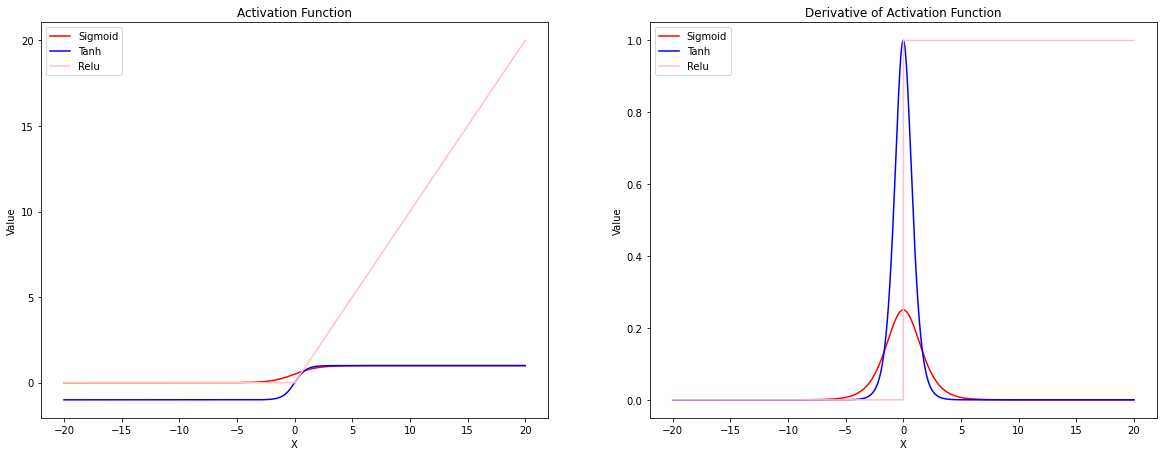

In [2]:
import matplotlib.pyplot as plt
X = np.linspace(-20,20,5000)   # 5000 equally spaced integers

plt.figure(figsize=(20,16))
Y_sig = [Sigmoid(val) for val in X]
Y_tanh = [tanh(val) for val in X]
Y_Relu = [Relu(val) for val in X]
Y_dsig = [Sigmoid(val,derivative=True) for val in X]
Y_dtanh = [tanh(val,derivative=True) for val in X]
Y_dRelu = [Relu(val,derivative=True) for val in X]

plt.subplot(2,2,1)
plt.plot(X,Y_sig,color = 'red',label = "Sigmoid")
plt.plot(X,Y_tanh,color = 'blue',label = "Tanh")
plt.plot(X,Y_Relu,color = 'pink',label = "Relu")
plt.title("Activation Function")
plt.xlabel("X")
plt.ylabel("Value")
plt.legend()

plt.subplot(2,2,2)
plt.plot(X,Y_dsig,color = 'red',label = "Sigmoid")
plt.plot(X,Y_dtanh,color = 'blue',label = "Tanh")
plt.plot(X,Y_dRelu,color = 'pink',label = "Relu")

plt.title("Derivative of Activation Function")
plt.xlabel("X")
plt.ylabel("Value")
plt.legend()
plt.show()

Q2. The objective of this exercise is to estimate XOR using a linear classifier. Best parameters for the linear classifier can be obtained by iteratively minimising penalty cost for misclassification. Lets consider mean square error(MSE) as penalty cost.
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
Let $f : \mathbb{R}^{n+1} \mapsto \mathbb{R}$. MSE is defined as:
\begin{equation*}
  f_w(x) = \sum_{i}\frac{1}{2}\norm{wx_i + c - Y}_2^2
\end{equation*}
Let $f_w^\prime$ and $f_c^\prime$ be the derivative of $f_w$ with respect to $w$ and $c$ respectively.
<!-- The derivative w.r.t $w$ is given by,
\begin{equation*}
  f_w^\prime(x) = (wx + c - Y)*x
\end{equation*} -->

Your task is to implement and execute the following steps in the given order,

Step 1. Define the XOR logic table as numpy arrays $X \in \mathbb{R}^{4\times 2}$ and $Y \in \mathbb{R}^{4\times 1}$ where, $X$ represent input bits and $Y$ represents output. (0.5 Point) \\
Step 2. Randomly initialise the parameters $w \in \mathbb{R}^{2\times 1}$ and $c \in \mathbb{R}$ of the linear classifier. Use 10 as seed for random initialiser. (0.5 Point) \\
Step 3. Compute the values for $f_w$, $f_w^\prime$ and $f_c^\prime$. (1.5 Point) \\
Step 4. Update the parameters of the linear classifier as per the equation (1 Point)\begin{equation*}
w = w - 0.01 * f_w^\prime
\end{equation*}
\begin{equation*}
c = c - 0.01 * f_c^\prime
\end{equation*}
\\
Step 5. Repeat steps 3 and 4 100 times. (0.5 Point)

Plot $X$ and the linear classifier on the same graph(The classifier is a 3D plane. You have to project it to 2D). Is the classification boundary accurate? Explain your observation. (2 Point)

In [3]:
def CostFunction(W,X,Y,C,derivative = False):
    loss = 0
    for i in range(len(X)):
        instance = X[i].reshape(-1,1)
        loss += 0.5*np.square(W.T.dot(instance) + C - Y[i])
    if derivative:
        loss_w = 0
        loss_c = 0
        # derivative of f w.r.t w =====> sum(W.T.dot(X) + C - Y).X
        # derivative of f w.r.t c =====> sum(W.T.dot(X) + C - Y)
        for i in range(len(X)):
            instance = X[i].reshape(-1,1)
            loss_w += (W.T.dot(instance) + C - Y[i])*instance
            loss_c += (W.T.dot(instance) + C - Y[i])
        return [loss_w,loss_c]   #loss_w will be the gradient vector and loss_c will be a Real value
    return loss       

In [4]:
# Step 1
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

# Step 2
np.random.seed(10)
w = np.random.rand(2,1)   # Uniformly Distributed
c = np.random.rand()      # Uniformly Distributed

In [5]:
fw = []
f_dw = 0
f_dc = 0
for epoch in range(100):
    fw.append((CostFunction(w,X,Y,c),epoch))
    f_dw,f_dc = CostFunction(w,X,Y,c,derivative= True)
    w = w - 0.01*f_dw
    c = c - 0.01*f_dc

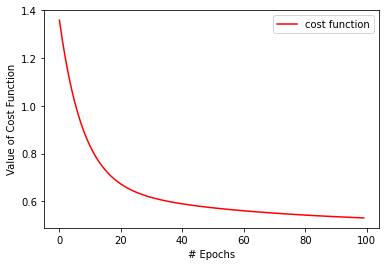

In [6]:
# Lets plot the Costfunction with respect to epochs
plt.plot(np.array(fw)[:,1],np.array(fw)[:,0],color = 'red',label = 'cost function')
plt.xlabel("# Epochs")
plt.ylabel('Value of Cost Function')
plt.legend()

# We can see that the Error goes down as the update happens

In [7]:
# Predicted Y
Y_pred = [w.T.dot(instance.reshape(-1,1)) + c for instance in X]

# The shape of the decision boundary will Irregular and will do a poor job as XOR problem turns out to be non linear and we are trying to fit a linear decision function. So model will likely to underfit. Hence will not do a good job.

In [11]:
U,sigma,V = np.linalg.svd(X)
Components = X.dot(V)

In [19]:
Components[:,0] # This should be the 1 Dimension representation of X

array([ 0.00000000e+00,  7.07106781e-01, -7.07106781e-01, -2.22044605e-16])

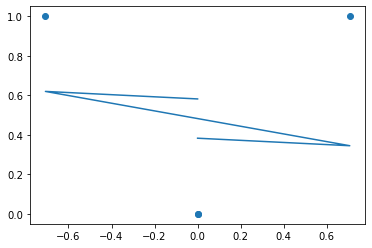

In [28]:
plt.scatter(Components[:,0] ,Y)  # Data Points
plt.plot(Components[:,0],np.array(Y_pred).ravel())   # Irregular Decision Boundary